#### Data Science Technologies

*Notebook by [Pedro V Hernandez Serrano](https://github.com/pedrohserrano)*

*License: [Attribution 4.0 International (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/)*  

---

## 1. Unsupervised Learning

Broad termn that includes an ever changing variety of methods such as: Clustering methods, Anomaly detection, latent variable models and Network algorithms

### 1.1 Network Analysis

Network analysis and graph representation have its basis in a joint field between discrete mathematics and topology called Graph theory. This field was born out of a very practical problem. (Konigsberg bridge problem, 1736)

Königsberg in Prussia (now Kaliningrad, Russia)
The problem was to devise a walk through the city that would cross each of those bridges once and only once.
The problem has no solution (touch all the edges without repeat the nodes)


<img src="../img/konigsberg.png" width="900">

Euler looked at this and figured out that you really cannot create such a walk.
Edsger Dijkstra, a well-known computer scientist who has developed graph algorithms.

<img src="../img/na1.png" width="600">

## Graph Theory

A graph is a pair of sets V and E, where V is the set of vertices and E is the set of edges, formed by pairs of vertices. 

<img src="../img/gt.png" width="800">

### Properties

- Edges that have the same vertices are parallel. $(e_4,e_5)$
- Edges are adjacent if they share a common end vertex. $(e_1,e_2)$
- An edge of the form $(v, v)$ is a loop. $e_3$
- A graph is simple if it has no parallel edges or loops.
- A graph with no edges (i.e. $E$ are empty) is empty.
- A graph with no vertices (i.e. $V$ and $E$ are empty) is a $null$ graph.
- A graph with only one vertex is trivial.


<img src="../img/gt1.png" width="400">

- The degree of the vertex $v$, written as $d(v)$, is the number of edges with $v$ as a vertex.
- Minimum degree in a graph $G$ is denoted $δ(G)$
- Maximum degree in a graph $G$ is we write $∆(G)$
- A pendant (leaf) vertex is a vertex whose degree is 1.
- An isolated vertex is a vertex whose degree is 0.
- The graph $G1 = (V1, E1)$ is a subgraph of $G2 = (V2, E2)$ if $V1V2$ and Every edge of $G1$ is also an edge of $G2$.

<img src="../img/gt1.png" width="400">

In [1]:
!pip install networkx

### 1.2 Networkx
* [Netwokx](https://networkx.github.io/documentation/networkx-1.9/index.html) is a Python language software package for the creation, manipulation, and study of the structure, dynamics, and function of complex networks.
* Uses the different methods to manipulate a graph
* Uses methods of centrality from graph theory
* Allows to create basic network plots

In [ ]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#### Graph Essentials

In [3]:
g = nx.Graph()

One node at a time

In [4]:
g.add_node(1)

A list of nodes

In [5]:
g.add_nodes_from([2 ,3])

A container of nodes

In [6]:
h = nx.path_graph(10)
g.add_nodes_from(h)

In [7]:
g.nodes()

NodeView((1, 2, 3, 0, 4, 5, 6, 7, 8, 9))

Remove node of the graph

In [8]:
g.remove_node(0)

Single edge

In [9]:
g.add_edge(1,2)

List of edges

In [10]:
g.add_edges_from([(1 ,2) ,(1 ,3)])

Container of edges

In [11]:
g.add_edges_from(h.edges())

In [12]:
g.edges()

EdgeView([(1, 2), (1, 3), (1, 0), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9)])

Remove edge of the graph

In [13]:
g.remove_edge(1,2)

In [14]:
g.edges()

EdgeView([(1, 3), (1, 0), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9)])

NetworkX is not primarily a graph drawing package but it provides basic drawing
capabilities by using matplotlib. 

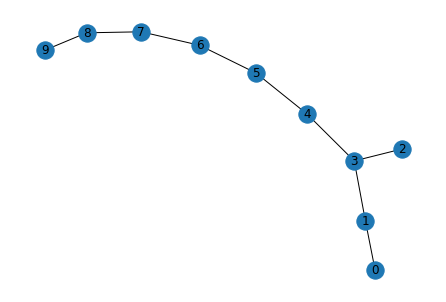

In [15]:
nx.draw(g, with_labels=True)

Precomputed Functions

In [16]:
shortest = nx.shortest_path(g)

In [17]:
shortest[2][0]

[2, 3, 1, 0]

In [18]:
g.number_of_nodes() # also g.order()

10

In [19]:
g.number_of_edges() # also g.size()

9

In [20]:
g.degree(3)

3

In [21]:
[n for n in g.neighbors(3)]

[1, 2, 4]

Any NetworkX graph behaves like a Python dictionary with nodes as primary keys (only for access!)

In [24]:
g.add_node(0, time='5pm')
g.nodes[0]['time']

'5pm'

The special edge attribute ’weight’ should always be numeric and holds values used by
algorithms requiring weighted edges. 

In [25]:
g.add_edge(1, 2, weight=4.0)

In [26]:
g[1][2]

{'weight': 4.0}

Many applications require iteration over nodes or over edges: simple and easy in
NetworkX

In [27]:
for node in g.nodes():
    print (node, g.degree(node))

1 3
2 2
3 3
4 2
5 2
6 2
7 2
8 2
9 1
0 1


In [28]:
for edge in g.edges(data=True):
    print (edge)

(1, 3, {})
(1, 0, {})
(1, 2, {'weight': 4.0})
(2, 3, {})
(3, 4, {})
(4, 5, {})
(5, 6, {})
(6, 7, {})
(7, 8, {})
(8, 9, {})


#### Retrieving a dataset

In [29]:
g = nx.florentine_families_graph() #small graph

In [30]:
nodes, edges = g.order(), g.size()

In [31]:
avg_deg = float(nodes)/edges

In [32]:
print ('Nodes: {}\nEdges: {}\nAvg Degree: {}'.format(nodes, edges, avg_deg) )

Nodes: 15
Edges: 20
Avg Degree: 0.75


In [33]:
for edge in g.edges(data=True):
    print (edge)

('Acciaiuoli', 'Medici', {})
('Medici', 'Barbadori', {})
('Medici', 'Ridolfi', {})
('Medici', 'Tornabuoni', {})
('Medici', 'Albizzi', {})
('Medici', 'Salviati', {})
('Castellani', 'Peruzzi', {})
('Castellani', 'Strozzi', {})
('Castellani', 'Barbadori', {})
('Peruzzi', 'Strozzi', {})
('Peruzzi', 'Bischeri', {})
('Strozzi', 'Ridolfi', {})
('Strozzi', 'Bischeri', {})
('Ridolfi', 'Tornabuoni', {})
('Tornabuoni', 'Guadagni', {})
('Albizzi', 'Ginori', {})
('Albizzi', 'Guadagni', {})
('Salviati', 'Pazzi', {})
('Bischeri', 'Guadagni', {})
('Guadagni', 'Lamberteschi', {})


### 1.3 Centrality Measures

In [34]:
def centrality_summary(centrality_output):
    stats = pd.DataFrame([i for i in centrality_output.values()]).describe()
    return stats

**Degree centrality**  
For particular node is the fraction of nodes it is connected to.

In [35]:
degree = nx.degree_centrality(g)

In [36]:
degree

{'Acciaiuoli': 0.07142857142857142,
 'Medici': 0.42857142857142855,
 'Castellani': 0.21428571428571427,
 'Peruzzi': 0.21428571428571427,
 'Strozzi': 0.2857142857142857,
 'Barbadori': 0.14285714285714285,
 'Ridolfi': 0.21428571428571427,
 'Tornabuoni': 0.21428571428571427,
 'Albizzi': 0.21428571428571427,
 'Salviati': 0.14285714285714285,
 'Pazzi': 0.07142857142857142,
 'Bischeri': 0.21428571428571427,
 'Guadagni': 0.2857142857142857,
 'Ginori': 0.07142857142857142,
 'Lamberteschi': 0.07142857142857142}

In [37]:
centrality_summary(degree)

,0
count,15.000000
mean,0.190476
std,0.099805
min,0.071429
25%,0.107143
50%,0.214286
75%,0.214286
max,0.428571


**Closeness centrality**   
Notice that higher values of closeness indicate higher centrality.

For a particular node $u$ is the reciprocal of the sum of the shortest path distances from $u$ to all $n-1$ other nodes. Since the sum of distances depends on the number of nodes in the graph, closeness is normalized by the sum of minimum possible distances $n-1$.  

$C(u) = \frac{n - 1}{\sum_{v=1}^{n-1} d(v, u)}$  
where $d(v, u)$ is the shortest-path distance between $v$ and $u$, and $n$ is the number of nodes in the graph.  

In [38]:
closeness = nx.closeness_centrality(g)

In [39]:
closeness

{'Acciaiuoli': 0.3684210526315789,
 'Medici': 0.56,
 'Castellani': 0.3888888888888889,
 'Peruzzi': 0.3684210526315789,
 'Strozzi': 0.4375,
 'Barbadori': 0.4375,
 'Ridolfi': 0.5,
 'Tornabuoni': 0.4827586206896552,
 'Albizzi': 0.4827586206896552,
 'Salviati': 0.3888888888888889,
 'Pazzi': 0.2857142857142857,
 'Bischeri': 0.4,
 'Guadagni': 0.4666666666666667,
 'Ginori': 0.3333333333333333,
 'Lamberteschi': 0.32558139534883723}

In [40]:
centrality_summary(closeness)

,0
count,15.000000
mean,0.415096
std,0.074844
min,0.285714
25%,0.368421
50%,0.400000
75%,0.474713
max,0.560000


**Betweenness centrality**   
It helps to detect influential nodes  

For a particular node $v$ is the sum of the fraction of all-pairs shortest paths that pass through $v$:  

$c_B(v) =\sum_{s,t \in V} \frac{\sigma(s, t|v)}{\sigma(s, t)}$  
where $V$ is the set of nodes, $\sigma(s, t)$ is the number of shortest $(s, t)$-paths, and $\sigma(s, t|v)$ is the number of those paths passing through some node $v$ other than $(s, t)$. If $(s = t)$, $(\sigma(s, t) = 1)$, and if $(v \in {s, t})$, $(\sigma(s, t|v) = 0)$   

In [41]:
betweenness = nx.betweenness_centrality(g)

In [42]:
betweenness

{'Acciaiuoli': 0.0,
 'Medici': 0.521978021978022,
 'Castellani': 0.05494505494505495,
 'Peruzzi': 0.02197802197802198,
 'Strozzi': 0.10256410256410257,
 'Barbadori': 0.09340659340659341,
 'Ridolfi': 0.11355311355311355,
 'Tornabuoni': 0.09157509157509157,
 'Albizzi': 0.21245421245421245,
 'Salviati': 0.14285714285714288,
 'Pazzi': 0.0,
 'Bischeri': 0.1043956043956044,
 'Guadagni': 0.2545787545787546,
 'Ginori': 0.0,
 'Lamberteschi': 0.0}

In [43]:
pagerank = nx.pagerank(g, alpha=0.9)

In [44]:
pagerank

{'Acciaiuoli': 0.028890757237692397,
 'Medici': 0.1481576776216192,
 'Castellani': 0.07046987542816795,
 'Peruzzi': 0.06936095679346559,
 'Strozzi': 0.09102599605689621,
 'Barbadori': 0.050031808323403926,
 'Ridolfi': 0.07112563699417926,
 'Tornabuoni': 0.07251428277949366,
 'Albizzi': 0.07832435802757254,
 'Salviati': 0.058640175901169066,
 'Pazzi': 0.0330540904684662,
 'Bischeri': 0.07024176052701805,
 'Guadagni': 0.0990466249610452,
 'Ginori': 0.030163428818308215,
 'Lamberteschi': 0.02895257006150243}

**Communicability**   
Between pairs of nodes in G is the sum of closed walks of different lengths starting at node u and ending at node v. 

This algorithm uses a spectral decomposition of the adjacency matrix. Let $G=(V,E)$ be a simple undirected graph. Using the connection between the powers of the adjacency matrix and the number of walks in the graph.  

$C(u,v)=\sum_{j=1}^{n}\phi_{j}(u)\phi_{j}(v)e^{\lambda_{j}}$    
where $\phi_{j}(u)$ is the $u\rm{th}$ element of the $j\rm{th}$ orthonormal eigenvector of the adjacency matrix associated with the eigenvalue $\lambda_{j}$.

In [45]:
communicability = nx.communicability(g)

In [46]:
communicability

{'Acciaiuoli': {'Acciaiuoli': 1.8493484166379492,
  'Medici': 2.614221300578799,
  'Castellani': 0.36948441281501965,
  'Peruzzi': 0.20953408514780292,
  'Strozzi': 0.4671322934828184,
  'Barbadori': 0.9236193447883454,
  'Ridolfi': 1.2608954970140651,
  'Tornabuoni': 1.2975131947316112,
  'Albizzi': 1.0411480740072612,
  'Salviati': 0.9026911439750323,
  'Pazzi': 0.240653522954361,
  'Bischeri': 0.2605456112718392,
  'Guadagni': 0.6540613878987086,
  'Ginori': 0.26504034778606433,
  'Lamberteschi': 0.13471992661986537},
 'Medici': {'Acciaiuoli': 2.614221300578799,
  'Medici': 7.2752156711542675,
  'Castellani': 1.6002857234189687,
  'Peruzzi': 1.0971623175696812,
  'Strozzi': 2.100459606248731,
  'Barbadori': 2.9837057133938156,
  'Ridolfi': 4.378866788793227,
  'Tornabuoni': 4.5291781854915705,
  'Albizzi': 3.533323036263572,
  'Salviati': 2.8548748235331596,
  'Pazzi': 0.902691143975031,
  'Bischeri': 1.3307277665293318,
  'Guadagni': 2.7339268066305773,
  'Ginori': 1.04114807400726

### Plotting Betweenness

In [47]:
tradeoff = 0.1
highbetw = {key if value > tradeoff else None for key, value in betweenness.items()}
normbetw = {key if value <= tradeoff else None for key, value in betweenness.items()}

In [48]:
subgraphs = [highbetw,normbetw]
colors = ["lightgreen", "lemonchiffon"] #more.. "skyblue", "mistyrose", "aliceblue"]
def find_color(node):
    for subgraph in subgraphs:
        if node in subgraph:
            return colors[subgraphs.index(subgraph)]
    return "ghostwhite"

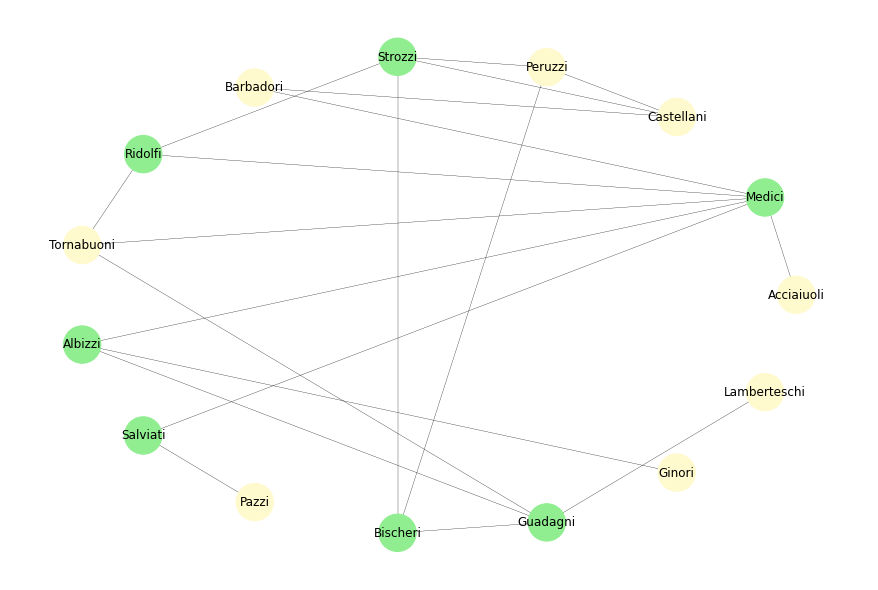

In [49]:
node_colors = [find_color(node) for node in g.nodes()]
plt.figure(figsize=(12, 8))
#nx.draw(g, with_labels=True, node_size=1400, node_color=node_colors, width=0.3)
nx.draw_circular(g, with_labels=True, node_size=1400, node_color=node_colors, width=0.3)

### Graph Properties

As a mathematical object a graph has shape properties by definition

#### Degree Frequency

In [50]:
# Create function to retrieve nodes and its degrees
def degree_table(degree_vector):
    d_table = pd.DataFrame()
    nodes, degrees = [], []
    for node, degree in degree_vector:
        nodes.append(node)
        degrees.append(degree)
    d_table['nodes'] = nodes
    d_table['degrees'] = degrees
    return d_table

In [51]:
degrees = degree_table(g.degree()) #also in_degree(), g.out_degree()
plot_degrees = degrees.groupby('degrees').count().head(10)

Text(0, 0.5, 'Number of nodes')

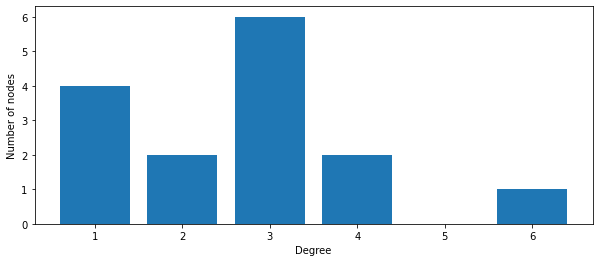

In [52]:
plt.figure(figsize=(10, 4))
plt.bar(plot_degrees.index, plot_degrees['nodes']) # degree
plt.xlabel('Degree')
plt.ylabel('Number of nodes')

**Eccentricity**   
Of a node v is the maximum distance from v to all other nodes in G.

The **diameter** is the maximum eccentricity.

In [53]:
nx.diameter(g)

5

The **radius** is the minimum eccentricity.

In [54]:
nx.radius(g)

3

The **center** is the set of nodes with eccentricity equal to radius.

In [55]:
nx.center(g)

['Medici', 'Ridolfi', 'Tornabuoni', 'Albizzi']

The **dijkstra** method to find the shortest path between two nodes 

In [56]:
dijkstra = nx.dijkstra_path(g,'Barbadori','Lamberteschi')

In [57]:
dijkstra

['Barbadori', 'Medici', 'Tornabuoni', 'Guadagni', 'Lamberteschi']

---
## 2. Clustering

### 2.1 K-means

Is a method of vector quantization, and aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean

K-means finds cluster centers by minimizing the sum of squared distances from each point to its assigned cluster. Points are assigned to the cluster whose center is closest.

After initial centers are chosen, two steps repeat until the cluster assignment no longer changes for any point (which is equivalent to the cluster centers no longer moving):

<img src="../img/ad8.png" width="800">

#### Choosing k  
In k-means for anomaly detection we must choose a value for k in advance and the final results are sensitive to initialization and often terminates at a local optimum. This is still an active area of research and no definitive answers. In general, a large k probably decreases the error but increases the risk of overfitting.

- No observable target to predict.
- The elbow method
- Heuristic
$ K = maxArg(sqrt(n/2), 1)$

##### Wine dataset
The Wine data set is a multivariate data set introduced by M. Forina et al. These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. [Info here ](https://pythonhosted.org/bob/temp/bob.db.wine/doc/index.html)

In [58]:
import pandas as pd
dataset = pd.read_csv('../datasets/wine_parvus.csv')

In [59]:
dataset.columns

Index(['Variety', 'Variety name', 'Alcohol', 'Malic acid', 'Ash',
       'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids',
       'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')

In [60]:
dataset.head()

,Variety,Variety name,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,Babera,11.50,2.01,2.46,17.04,106.34,2.84,2.98,0.29,1.90,11.80,1.06,3.16,1115.71
1,1,Babera,14.23,1.71,2.43,15.60,127.00,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.00
2,1,Babera,13.20,1.78,2.14,11.20,100.00,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.00
3,1,Babera,13.16,2.36,2.67,18.60,101.00,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.00
4,1,Babera,14.37,1.95,2.50,16.80,113.00,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.00


In [61]:
import warnings
warnings.filterwarnings('ignore')

In [62]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('fivethirtyeight')

In [63]:
X = dataset[['Alcohol','Color intensity']]

In [64]:
X.describe()

,Alcohol,Color intensity
count,180.000000,180.000000
mean,13.010056,5.071889
std,0.849337,2.381056
min,11.030000,0.800000
25%,12.355000,3.200000
50%,13.050000,4.690000
75%,13.682500,6.212500
max,16.200000,13.000000


#### Standard Scaler

<img src="../img/standard.png" width="400">

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Prior number of Clusters**

In [66]:
K = int(np.sqrt(len(dataset) / 2.0))

In [67]:
print('Number of Clusters K: {}'.format(K))

Number of Clusters K: 9


In [68]:
from sklearn.cluster import KMeans

In [69]:
model = KMeans(n_clusters = K)

fit_predict to fit model and obtain cluster labels

In [70]:
clusters = model.fit_predict(X_scaled)

In [71]:
clusters

array([4, 8, 7, 1, 8, 7, 8, 8, 8, 8, 1, 8, 8, 1, 8, 8, 1, 8, 1, 2, 1, 8,
       7, 7, 7, 7, 7, 7, 7, 8, 8, 1, 1, 7, 1, 7, 7, 7, 7, 7, 8, 1, 7, 8,
       7, 7, 8, 8, 1, 8, 2, 1, 1, 1, 1, 1, 1, 8, 1, 1, 0, 0, 5, 7, 5, 0,
       5, 7, 5, 7, 0, 0, 7, 7, 7, 6, 6, 7, 6, 0, 0, 6, 5, 0, 7, 6, 0, 0,
       6, 6, 0, 0, 6, 0, 0, 6, 0, 6, 0, 5, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0,
       6, 6, 0, 6, 6, 0, 6, 6, 0, 0, 0, 6, 5, 0, 7, 6, 0, 5, 6, 0, 0, 7,
       5, 5, 5, 5, 4, 0, 5, 1, 5, 7, 1, 7, 7, 4, 7, 8, 4, 2, 4, 2, 4, 1,
       2, 4, 4, 2, 4, 2, 2, 4, 1, 5, 5, 2, 1, 2, 4, 2, 2, 5, 4, 2, 1, 1,
       2, 2, 2, 3], dtype=int32)

Adding the labels to the dataset

In [72]:
dataset['cluster_id'] = clusters

In [73]:
dataset.groupby('cluster_id').count()['Variety'].reset_index()

,cluster_id,Variety
0,0,35
1,1,26
2,2,16
3,3,1
4,4,12
5,5,17
6,6,20
7,7,32
8,8,21


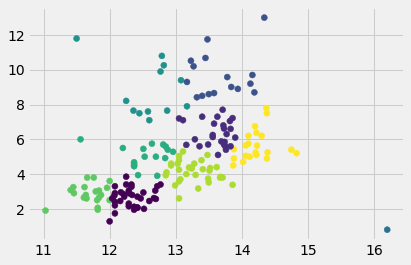

In [74]:
plt.scatter(dataset['Alcohol'], dataset['Color intensity'], c=clusters)

**Making groups**

In [75]:
groups = dataset.groupby(['cluster_id','Variety']).count()['Variety name'].reset_index()
groups.columns = ['cluster_id','Variety','count']

In [76]:
groups.head()

,cluster_id,Variety,count
0,0,2,34
1,0,3,1
2,1,1,19
3,1,3,7
4,2,1,2


In [77]:
anomalies = groups[groups['count'] == 1]

In [78]:
anomalies

,cluster_id,Variety,count
1,0,3,1
6,3,3,1
7,4,1,1
16,8,3,1


In [79]:
dataset['Variety'].unique()

array([1, 2, 3])

In [80]:
g1 = anomalies.iloc[:,0].values
g2 = anomalies.iloc[:,1].values

In [81]:
anomalies_df = pd.DataFrame()
for i, j in zip(g1, g2):
    anomalies_df = anomalies_df.append(dataset[
        (dataset['cluster_id'] == i) & (dataset['Variety'] == j)])

In [82]:
anomalies_df

,Variety,Variety name,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,cluster_id
137,3,Grignolino,12.25,4.72,2.54,21.00,89.00,1.38,0.47,0.53,0.80,3.85,0.75,1.27,720.00,0
179,3,Grignolino,16.20,3.33,2.44,21.42,99.31,1.68,0.78,0.45,1.15,0.80,0.68,1.68,629.90,3
0,1,Babera,11.50,2.01,2.46,17.04,106.34,2.84,2.98,0.29,1.90,11.80,1.06,3.16,1115.71,4
147,3,Grignolino,13.88,5.04,2.23,20.00,80.00,0.98,0.34,0.40,0.68,4.90,0.58,1.33,415.00,8


In [83]:
dataset['anomaly'] = [1 if i in anomalies_df.index else 0 for i in dataset.index]   

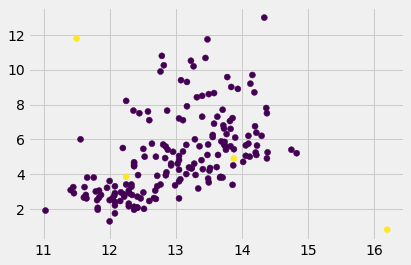

In [84]:
plt.scatter(dataset['Alcohol'], dataset['Color intensity'], c=dataset['anomaly'])

### 2.2 Silhoutte Distance

Silhoutte Distance is used to study the separation between clusters. It can be used to evaluate and select the number of clusters. The formula is given by:

$$ s\left(i\right)=\frac{b\left(i\right)-a\left(i\right)}{\max\left(a\left(i\right),b\left(i\right)\right)} $$

Where, 
1. $a(i)$ = average distance of point $i$ with other members of same cluster. 
2. $b(i)$ = lowest of average distance of point $i$ with member of clusters other than the one it is currently present in. 

The value of $s(i)$ ranges from:

$$-1\le s\left(i\right)\le1$$

The value will be close to 1 when $b(i) >> a(i)$. That is when the nearest neighbor of point $i$ is very far & the members of clusters that $i$ is a part of aren't very far apart. This is the case when the clustering has worked well. 

The opposite case is when the value is close to -1. This happens when $a(i) >> b(i)$. That is when the the average distance of point within cluster is more than that of the neighboring one, then this indicates that the current point would do better if it is assigned to the neighboring one. 

In [85]:
from sklearn.metrics import silhouette_score

In [86]:
scores = []
for K in range(2, 30):
    model = KMeans(n_clusters = K)
    labels = model.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    scores.append(score)

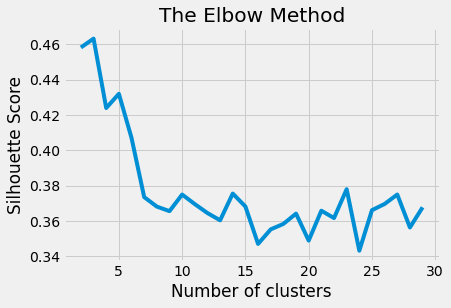

In [87]:
plt.plot(range(2, 30), scores)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

---
### 2.3 DBSCAN 

Short for Density-Based Spatial Clustering of Applications with Noise, is the most popular density-based clustering method. We attempt to capture our intuition that a cluster is a region of the data space where there are lots of points, surrounded by a region where there are few points.

The goal is to identify dense regions, which can be measured by the number of objects close to a given point.

Parameters:  
**Epsilon (ε):** Is the radius of neighborhood around a point x. It is called called the ε − neighborhood of x.  
**Minimum points (MinPts):** Is the minimum number of neighbors within ε radius.

Any point x in the dataset, with a neighbor count greater than or equal to MinPts, is marked as a core point. We say that x is border point, if the number of its neighbors is less than MinPts, but it belongs to the
ε − neighborhood of some core point xi. Finally, if a point is neither a core nor a border point, then it is called a noise point or anomalous.

![](../img/ad10.png)

- The number of clusters does not need to be known a priori.
- Recovers much more flexible cluster shapes than K-means, which can
only find spherical clusters.
- Intrinsically finds and labels outliers as such, making it a great solution for anomaly detection.
- It works with any distance function. (e.g. "euclidean", "manhattan", "jaccard", and "levenshtein" )

#### Comparison of methods

In [89]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [95]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

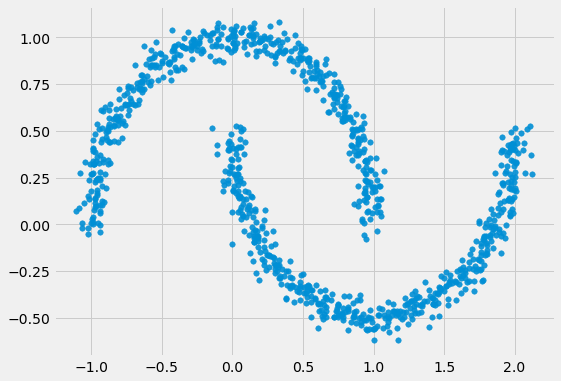

In [106]:
plt.figure(figsize=[8, 6])
plt.scatter(X[:, 0], X[:, 1], s=30, alpha=0.9)

How would it work with K-means?

In [107]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [108]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 2)
clusters = model.fit_predict(X_scaled)

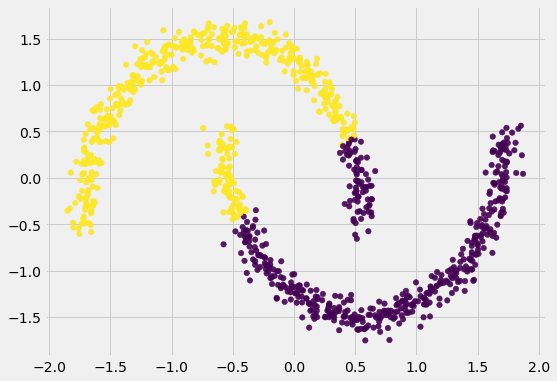

In [109]:
plt.figure(figsize=[8, 6])
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], s=30, alpha=0.9, c=clusters)

#### Now let's see with DBSCAN

In [110]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=4) #radius and min_core_neighbors

In [111]:
clusters = dbscan.fit_predict(X_scaled)

In [112]:
set(clusters)

{0, 1}

To compute DBSCAN we’ll go point by point and check if it is a core point or not. If it is a core point we will create a new cluster, then search through all of its neighbors. We’ll add the neighborhoods of all these points to the cluster. If one of the points is a core point as well, it’s neighborhood will be added to our search. This will continue until we cannot reach anymore points. Then we’ll move on to the next point that we haven’t visited/labeled yet.

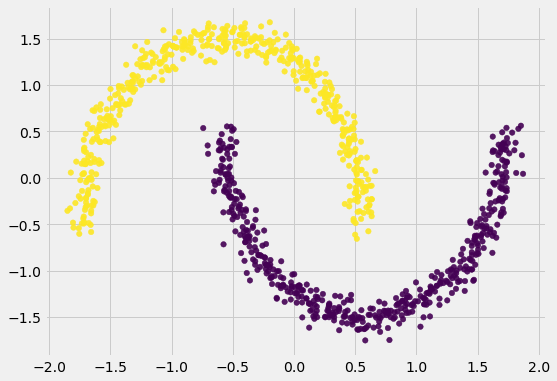

In [115]:
plt.figure(figsize=[8, 6])
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], s=30, alpha=0.9, c=clusters)